In [32]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [34]:
data=pd.read_csv("List of Countries by Sugarcane Production.csv")

In [36]:
data

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


In [38]:
data.shape

(103, 7)

## Cleaning and handling missing values

In [40]:
data["Production (Tons)"]=data["Production (Tons)"].str.replace(".","")
data["Production per Person (Kg)"]=data["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
data["Acreage (Hectare)"]=data["Acreage (Hectare)"].str.replace(".","")
data["Yield (Kg / Hectare)"]=data["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")
data

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,28386.4
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8


In [42]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [44]:
data.rename(columns={"Production (Tons)":"Production(Tons)"},inplace=True)
data.rename(columns={"Production per Person (Kg)":"ProductionperPerson(Kg)"},inplace=True)
data.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
data.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)

In [46]:
data.head()

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [48]:
data.isnull().sum()

Unnamed: 0                 0
Country                    0
Continent                  0
Production(Tons)           0
ProductionperPerson(Kg)    0
Acreage(Hectare)           1
Yield(Kg/Hectare)          1
dtype: int64

# Ensuring data integrity and consistency

In [50]:
data[data["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [52]:
data[data["Yield(Kg/Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [54]:
data=data.dropna().reset_index()
data.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [56]:
data.drop(["index","Unnamed: 0"],axis=1,inplace=True)
data.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [58]:
data.tail()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8
101,Syria,Asia,1,0,0,83034.2


In [60]:
data.dtypes

Country                    object
Continent                  object
Production(Tons)           object
ProductionperPerson(Kg)    object
Acreage(Hectare)           object
Yield(Kg/Hectare)          object
dtype: object

In [62]:
data["Production(Tons)"]=data["Production(Tons)"].astype(float)
data["ProductionperPerson(Kg)"]=data["ProductionperPerson(Kg)"].astype(float)
data["Acreage(Hectare)"]=data["Acreage(Hectare)"].astype(float)
data["Yield(Kg/Hectare)"]=data["Yield(Kg/Hectare)"].astype(float)

In [103]:
data.dtypes

Country                     object
Continent                   object
Production(Tons)           float64
ProductionperPerson(Kg)    float64
Acreage(Hectare)           float64
Yield(Kg/Hectare)          float64
dtype: object

In [64]:
data.nunique()

Country                    102
Continent                    6
Production(Tons)           102
ProductionperPerson(Kg)    101
Acreage(Hectare)           101
Yield(Kg/Hectare)          102
dtype: int64

## UNIVARIATE ANALYSIS

In [66]:
data.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### HOW MANY COUNTRIES PRODUCE SUGARCANE FROM EACH CONTINENT

# Feature selection and engineering

In [68]:
data["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

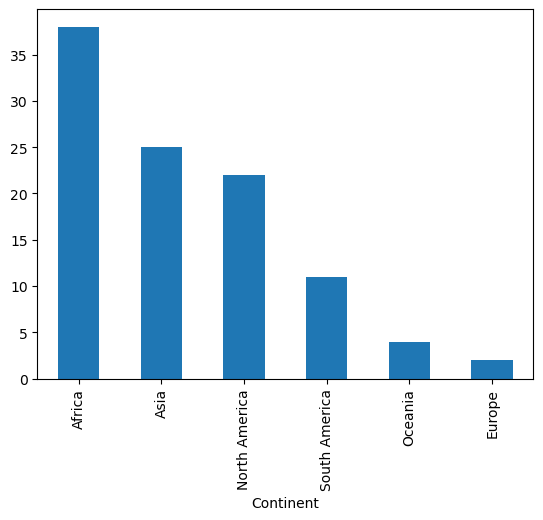

In [70]:
data["Continent"].value_counts().plot(kind="bar")

C:\Users\dv2153tu\AppData\Local\Temp\ipykernel_6052\1308647564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Production(Tons)"])
C:\Users\dv2153tu\AppData\Local\Temp\ipykernel_6052\1308647564.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["ProductionperPerson(Kg)"])
C:\User

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

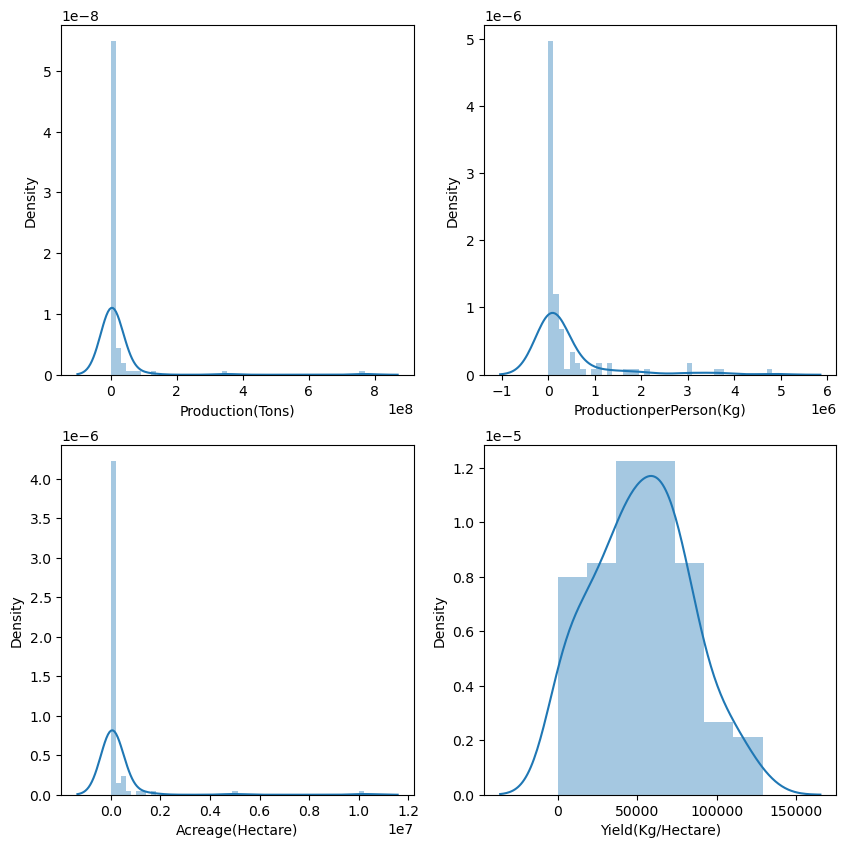

In [115]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data["Production(Tons)"])

plt.subplot(2,2,2)
sns.distplot(data["ProductionperPerson(Kg)"])

plt.subplot(2,2,3)
sns.distplot(data["Acreage(Hectare)"])

plt.subplot(2,2,4)
sns.distplot(data["Yield(Kg/Hectare)"])

# Identifying patterns, trends, and anomalies

<Axes: ylabel='Yield(Kg/Hectare)'>

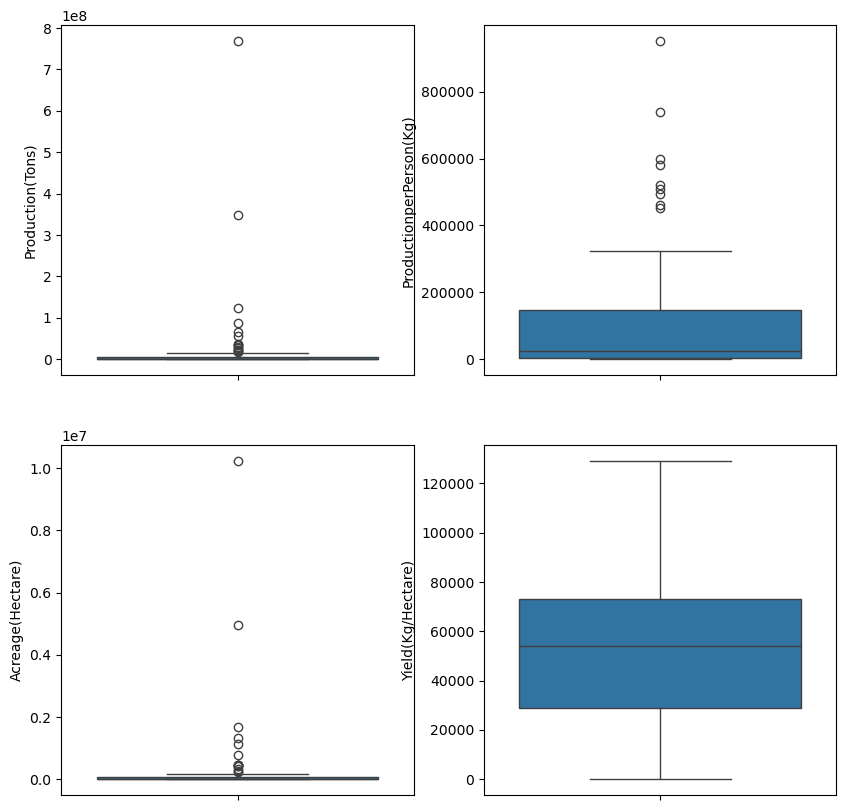

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data["Production(Tons)"])

plt.subplot(2,2,2)
sns.boxplot(data["ProductionperPerson(Kg)"])

plt.subplot(2,2,3)
sns.boxplot(data["Acreage(Hectare)"])

plt.subplot(2,2,4)
sns.boxplot(data["Yield(Kg/Hectare)"])

In [74]:
data.describe()

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## BIVARIATE ANALYSIS

In [76]:
data.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### WHICH COUNTRY PRODUCES AMAXIMUM SUGARCANE

In [80]:
data_new=data[["Country","Production(Tons)"]].set_index("Country")

In [82]:
data_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [84]:
data_new["Production(Tons)_percent"]=data_new["Production(Tons)"]*100/data_new["Production(Tons)"].sum()
data_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

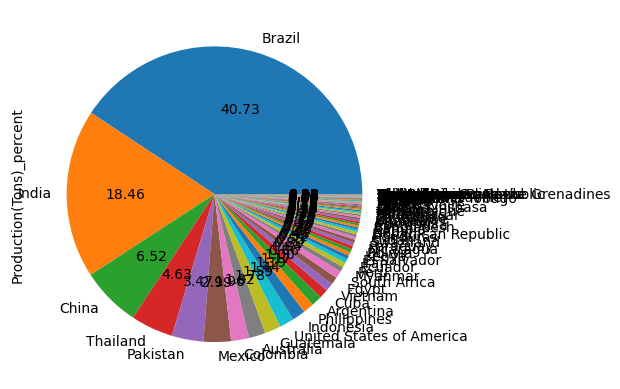

In [133]:
data_new["Production(Tons)_percent"].plot(kind='pie',autopct="%.2f")

<Axes: xlabel='Country'>

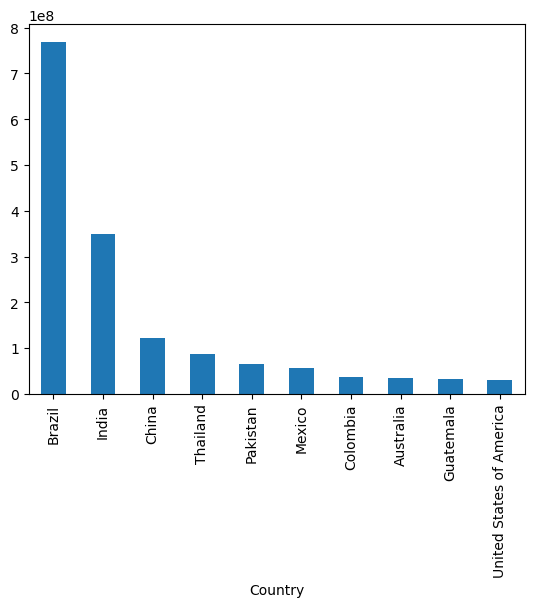

In [86]:
data_new["Production(Tons)"].head(10).plot(kind="bar")

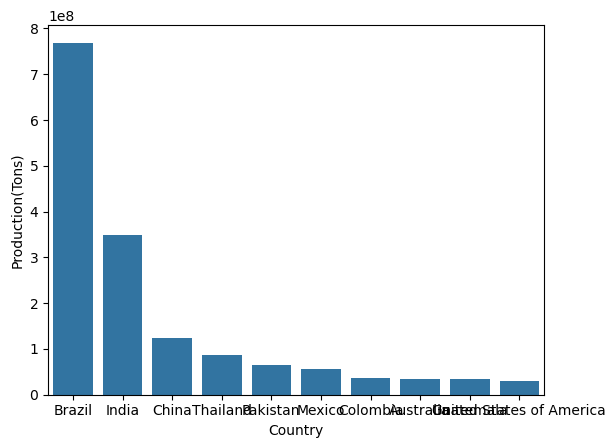

In [88]:
ax=sns.barplot(data=data.head(10),x="Country",y="Production(Tons)")

In [90]:
data.head(10)

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
9,United States of America,North America,29926210.0,91304.000,37053.0,80766.0


C:\Users\dv2153tu\AppData\Local\Temp\ipykernel_23880\5498184.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


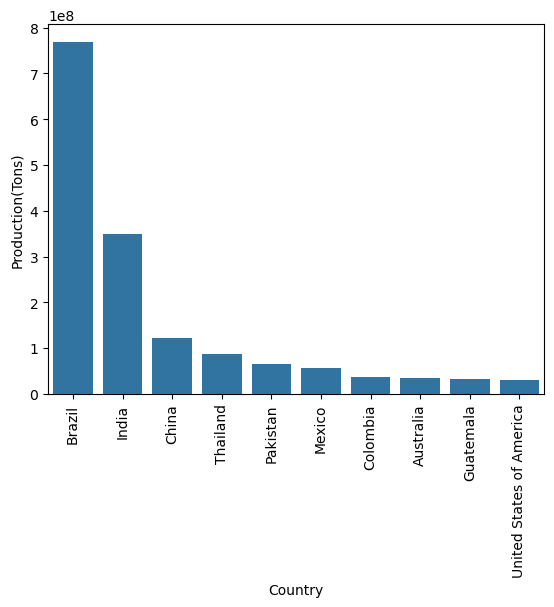

In [92]:
ax=sns.barplot(data=data.head(10),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### WHICH COUNTRY HAS HIGHEST LAND

C:\Users\dv2153tu\AppData\Local\Temp\ipykernel_23880\189874679.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


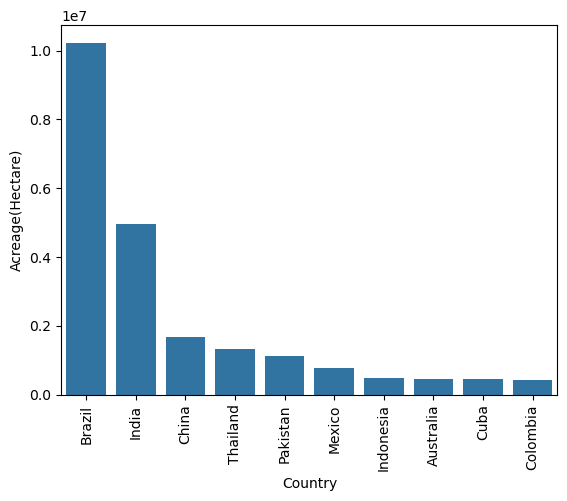

In [94]:
data_acr=data.sort_values("Acreage(Hectare)",ascending=False)
ax=sns.barplot(data=data_acr.head(10),x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### WHICH COUNTRY HAS HIGHEST YIELD PER HECTARE

C:\Users\dv2153tu\AppData\Local\Temp\ipykernel_23880\2616106241.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


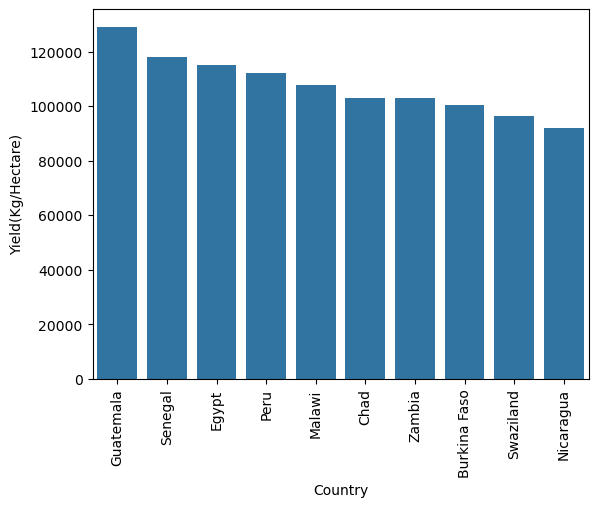

In [100]:
data_yield=data.sort_values("Yield(Kg/Hectare)",ascending=False)
ax=sns.barplot(data=data_yield.head(10),x="Country",y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [102]:
data

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


### WHICH COUNTRY HAS HIGHEST PRODUCTION


C:\Users\dv2153tu\AppData\Local\Temp\ipykernel_23880\641696981.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


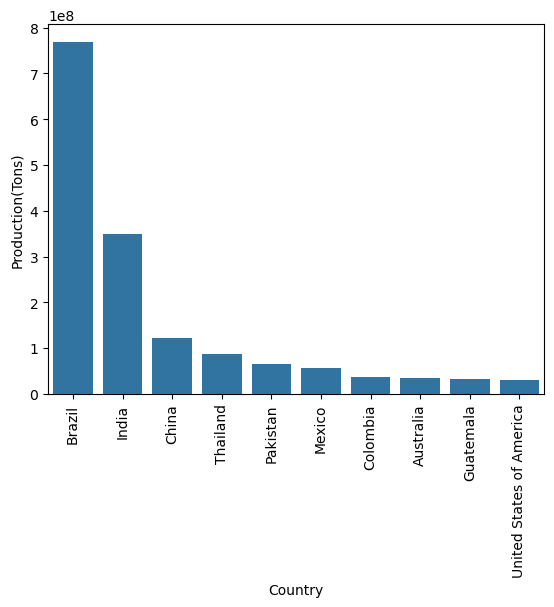

In [104]:
data_yield=data.sort_values("Production(Tons)",ascending=False)
ax=sns.barplot(data=data_yield.head(10),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## CORRELATION

In [133]:
data.corr()             # error

ValueError: could not convert string to float: 'Brazil'

In [137]:
sns.heatmap(data.corr(),annot=True)      

ValueError: could not convert string to float: 'Brazil'

### DO COUNTRIES WITH HIGHEST LAND PRODUCE  MORE SUGARCANE

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

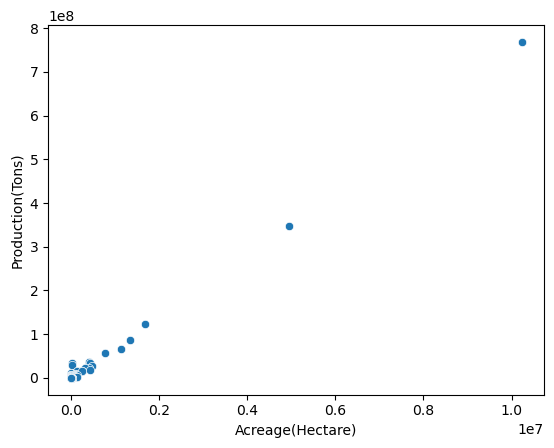

In [140]:
sns.scatterplot(data=data,x="Acreage(Hectare)",y="Production(Tons)")

### DO COUNTRIES WHICH YIELD MORE SUGARCANE PER HECTARE PRODUCES MORE SUGARCANE IN TOTAL

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

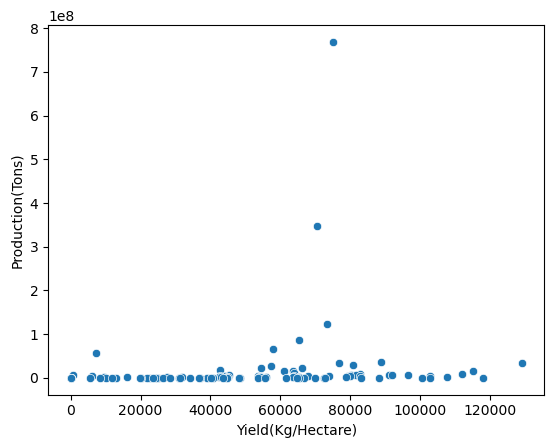

In [143]:
sns.scatterplot(data=data,x="Yield(Kg/Hectare)",y="Production(Tons)")

## ANALYSIS FOR CONTINENT

In [146]:
data_continent=data.groupby("Continent").sum()

In [148]:
data_continent

,Country,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


### WHICH CONTINENT PRODUCES MAXIMUM SUGARCANE

In [155]:
data["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

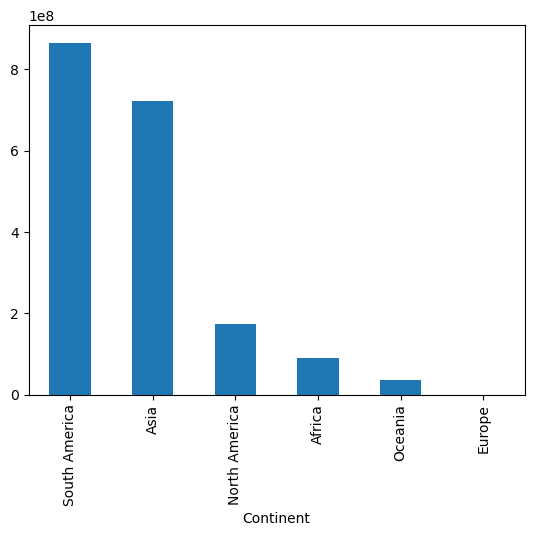

In [151]:
data_continent["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

### DO NUMBER OF COUNTRIES IN A CONTINENTS EFFECT PRODUCTION OF SUGARCANE

In [158]:
data_continent["number_of_countries"]=data.groupby("Continent").count()["Country"]

In [160]:
data_continent

,Country,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


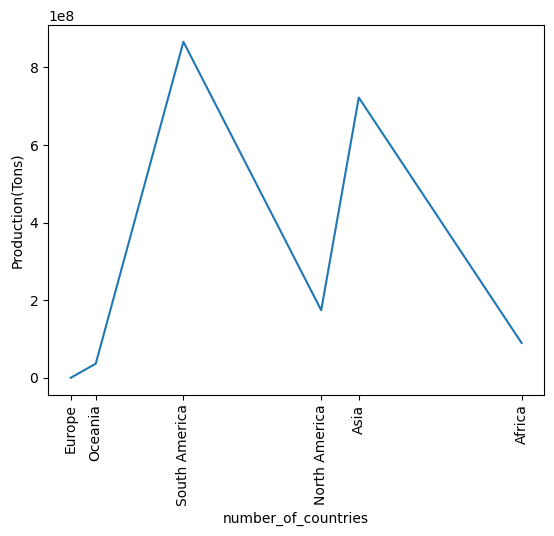

In [166]:
continent_names=data_continent.index.to_list()
sns.lineplot(data=data_continent,x="number_of_countries",y="Production(Tons)")
plt.xticks(data_continent["number_of_countries"],continent_names,rotation=90)
plt.show()

### PRODUCTION DITRIBUTION BY CONTINENT

<Axes: ylabel='Production(Tons)'>

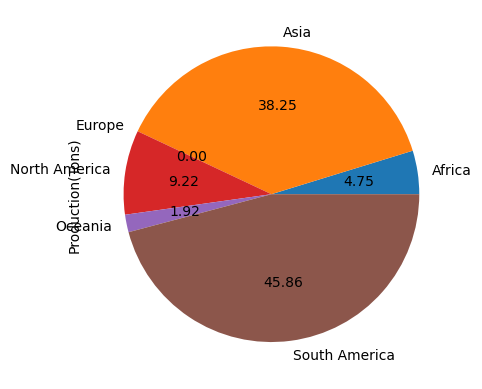

In [174]:
data_continent["Production(Tons)"].plot(kind="pie",autopct="%.2f")

### CORRELATION FOR CONTINENT

In [169]:
data_continent.corr()

ValueError: could not convert string to float: "EgyptSouth AfricaKenyaSwazilandSudanZambiaMauritiusUgandaZimbabweMadagascarTanzaniaMalawiMozambiqueCongo-KinshasaCôte d'IvoireEthiopiaNigeriaCameroonSenegalCongo-BrazzavilleAngolaBurkina FasoChadMoroccoMaliGuineaGabonLiberiaBurundiNigerSomaliaGhanaCentral African RepublicRwandaSierra LeoneCape VerdeBeninGuinea-Bissau"